<a href="https://colab.research.google.com/github/Vishesh-16/Data-Projects/blob/main/Jamboree_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

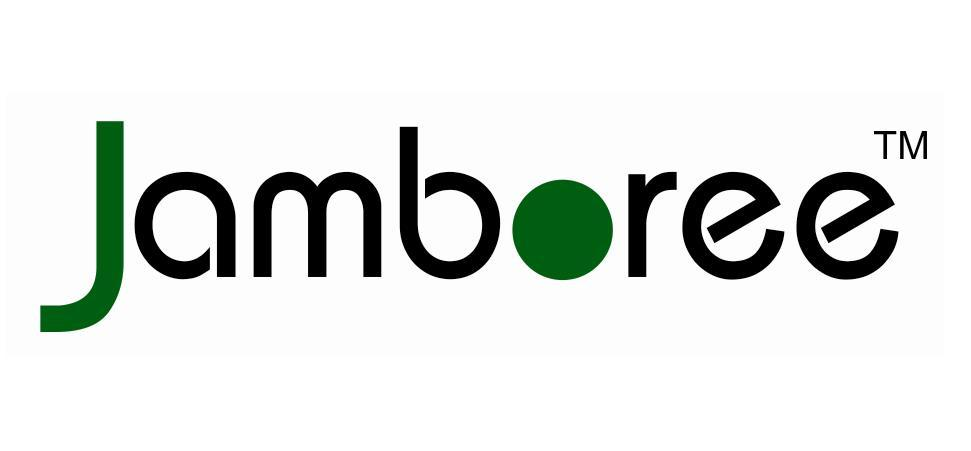

# **JAMBOREE EDUCATION**


Established in 1993 with a vision to make global education accessible, Jamboree Education has been pioneering international university admissions for 3 decades now. It has helped more than 200,000 students realise their dream of studying in prestigious colleges including Harvard, Stanford, MIT, Oxford, Yale and LBS.

Jamboree has earned the reputation as the go-to place for students aspiring to study at the top universities around the world. Its underlying moral is they understand that each student is unique, and  approach reflects this belief, ensuring that every student receives the attention and guidance they deserve.

# **PROBLEM STATEMENT**

- Help Jamboree in understanding what factors are important in graduate admissions.
- How these factors are interrelated among themselves.
- It will also help predict one's chances of admission given the rest of the variables.

**GOAL**

This case study aims to predict the chance of admission to a graduate program using applicant profile data such as GRE, TOEFL scores, CGPA, and research experience. By applying regression models and validating key statistical assumptions, we need to derive meaningful insights into feature importance and model performance. The project also explores how such a model can support students and universities in making data-driven decisions.

# **IMPORTING LIBRARIES**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

# **FILE UPLOAD - DATASET**

In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv" -O Jamboree.csv

--2025-06-14 02:42:59--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.46, 18.172.139.94, 18.172.139.61, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree.csv’

Jamboree.csv        100%[===================>]  15.80K  --.-KB/s    in 0s      

2025-06-14 02:42:59 (142 MB/s) - ‘Jamboree.csv’ saved [16176/16176]



In [ ]:
df = pd.read_csv("Jamboree.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


#**EXPLORATORY DATA ANALYSIS**

##**Shape of data**

In [ ]:
print("No of rows :",df.shape[0])
print("No of columns :",df.shape[1])

no of rows : 500
no of columns : 9


 ## **Data types of all the Attributes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## **Statistical Summary**

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## **Missing Value Detection and Treatment**

In [ ]:
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


**ANALYSIS:**
- The dataset is complete with no missing values, ensuring that all features are ready for analysis without the need for imputation or data cleaning related to nulls.

In [ ]:
df.drop(["Serial No."], axis = 1,inplace = True)

**ANALYSIS:**
- The Serial Number column was removed since it is a non-informative feature, and does not contribute to the prediction of the target variable.

## **Univariate Analysis**

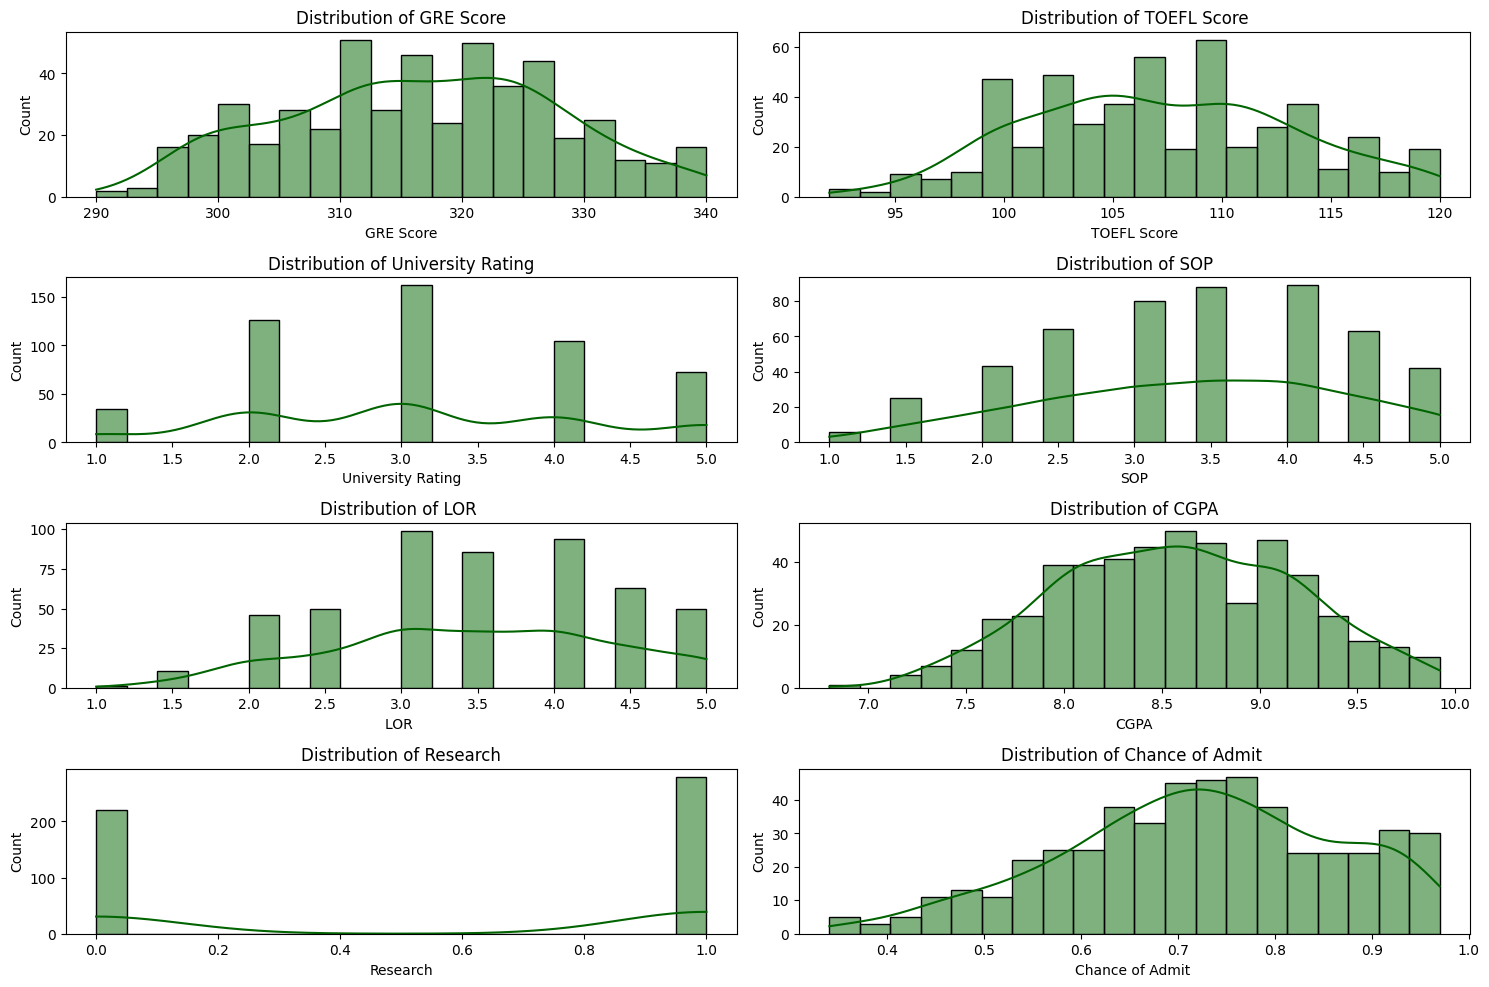

In [ ]:
features = df.columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(features):
    plt.subplot(5, 2, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='darkgreen')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


**ANALYSIS:**

- **GRE Score:**
  - Roughly normal distribution centered around 315–320.
  - No extreme outliers.
  - Most scores between 300–330.

- **TOEFL Score:**
  - Normally distributed, centered around 105–110.
  - Well-balanced, no skewness observed.

- **University Rating:**
  - Discrete variable (1–5), with ratings 2, 3, and 4 more frequent.
  - Slight dip at rating 5.

- **SOP & LOR:**
  - Discrete, with SOP and LOR values concentrated between 3.0–4.5.
  - Fairly uniform but slightly right-skewed.

- **CGPA:**
  - Normally distributed, centered around 8.5–9.0.
  - Indicates most students are high performers.

- **Research:**
  - Binary feature: 0 or 1.

- **Chance of Admit:**
  - Positively skewed (right-tailed).
  - Most students have a probability between 0.6 and 0.9.

## **Outlier Detection**

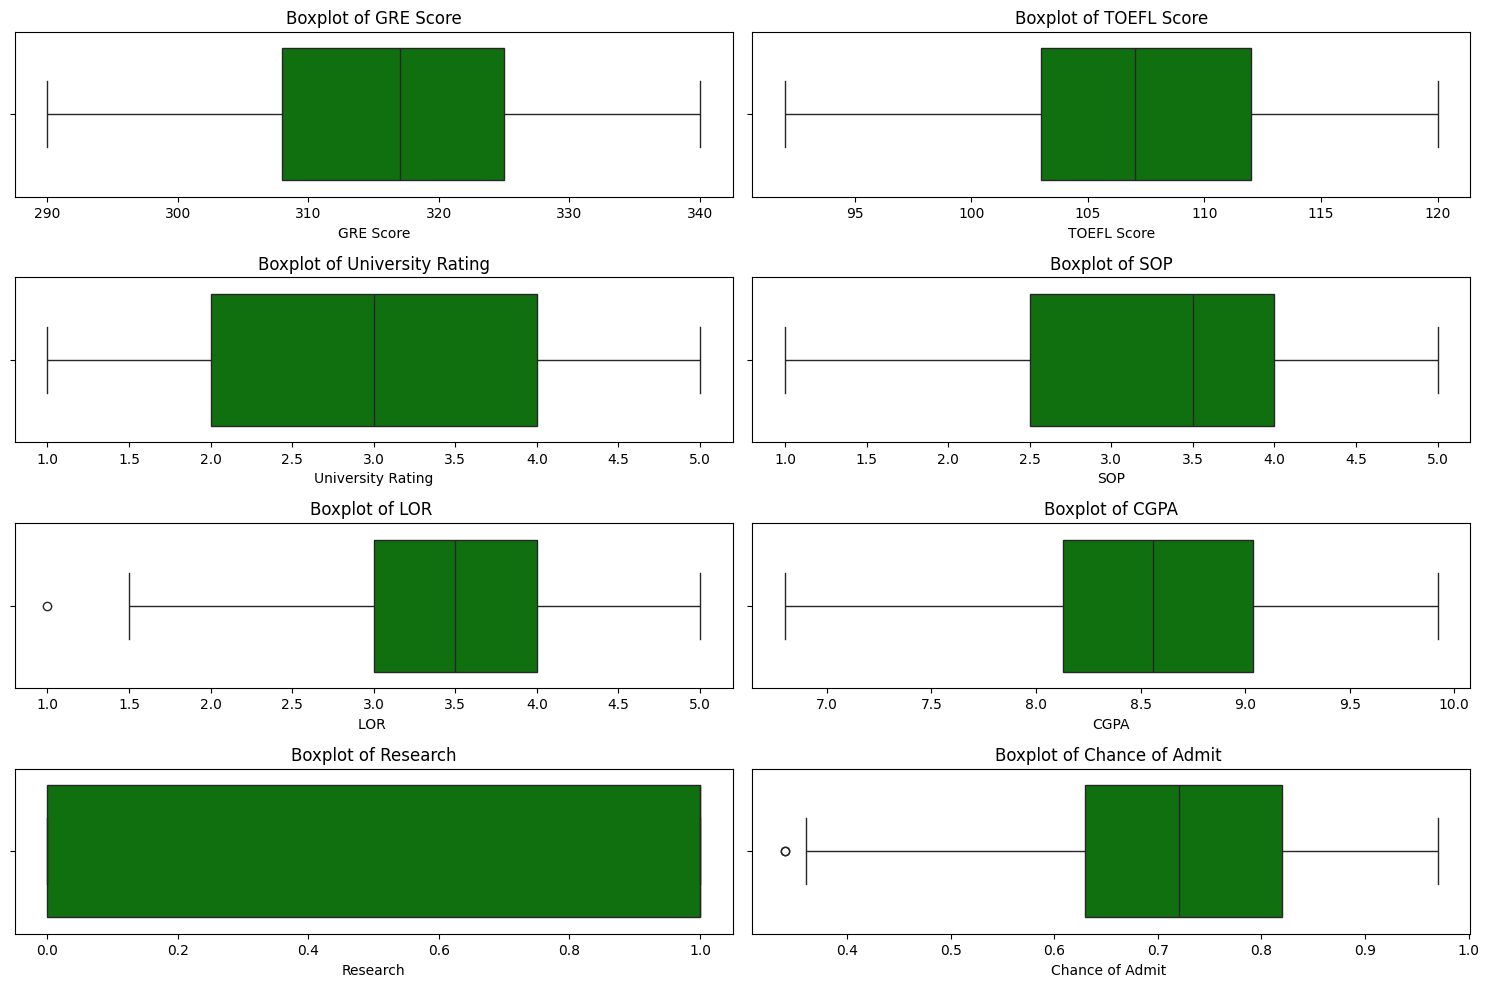

In [ ]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(features):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


- **ANALYSIS:**
  - No major data quality issues like missing values or invalid entries.
  - The target (Chance of Admit) is slightly right-skewed.
  - Most features show a normal or near-normal distribution, which is good for linear regression.
  - Outliers are minimal and not severe.
  
- We can choose to retain them unless model sensitivity becomes an issue

## **Bivariate Analysis**

### **Heatmap to show Correlation among Features and the Target Variable**

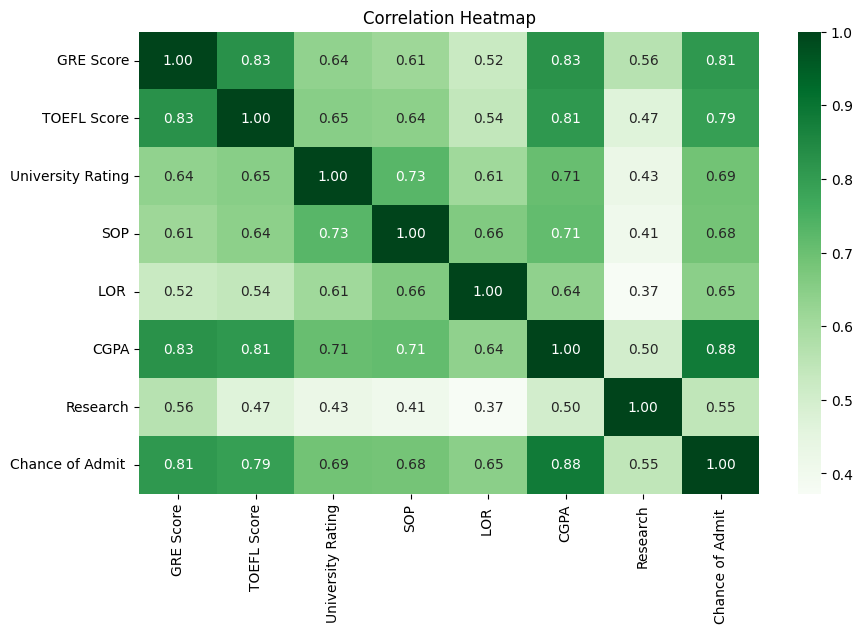

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**ANALYSIS:**
- **Strong Correlations	Value**
  - CGPA vs Chance of Admit	0.88
  - GRE Score vs CGPA	0.83
  - GRE Score vs Chance of Admit	0.81
  - TOEFL Score vs Chance of Admit	0.79
  - University Rating vs SOP	0.73

- CGPA is the strongest predictor of Chance of Admit, followed by GRE and TOEFL scores.
- Research, LOR, SOP show weaker correlation individually.

### **Pairplot and Feature Relationship**

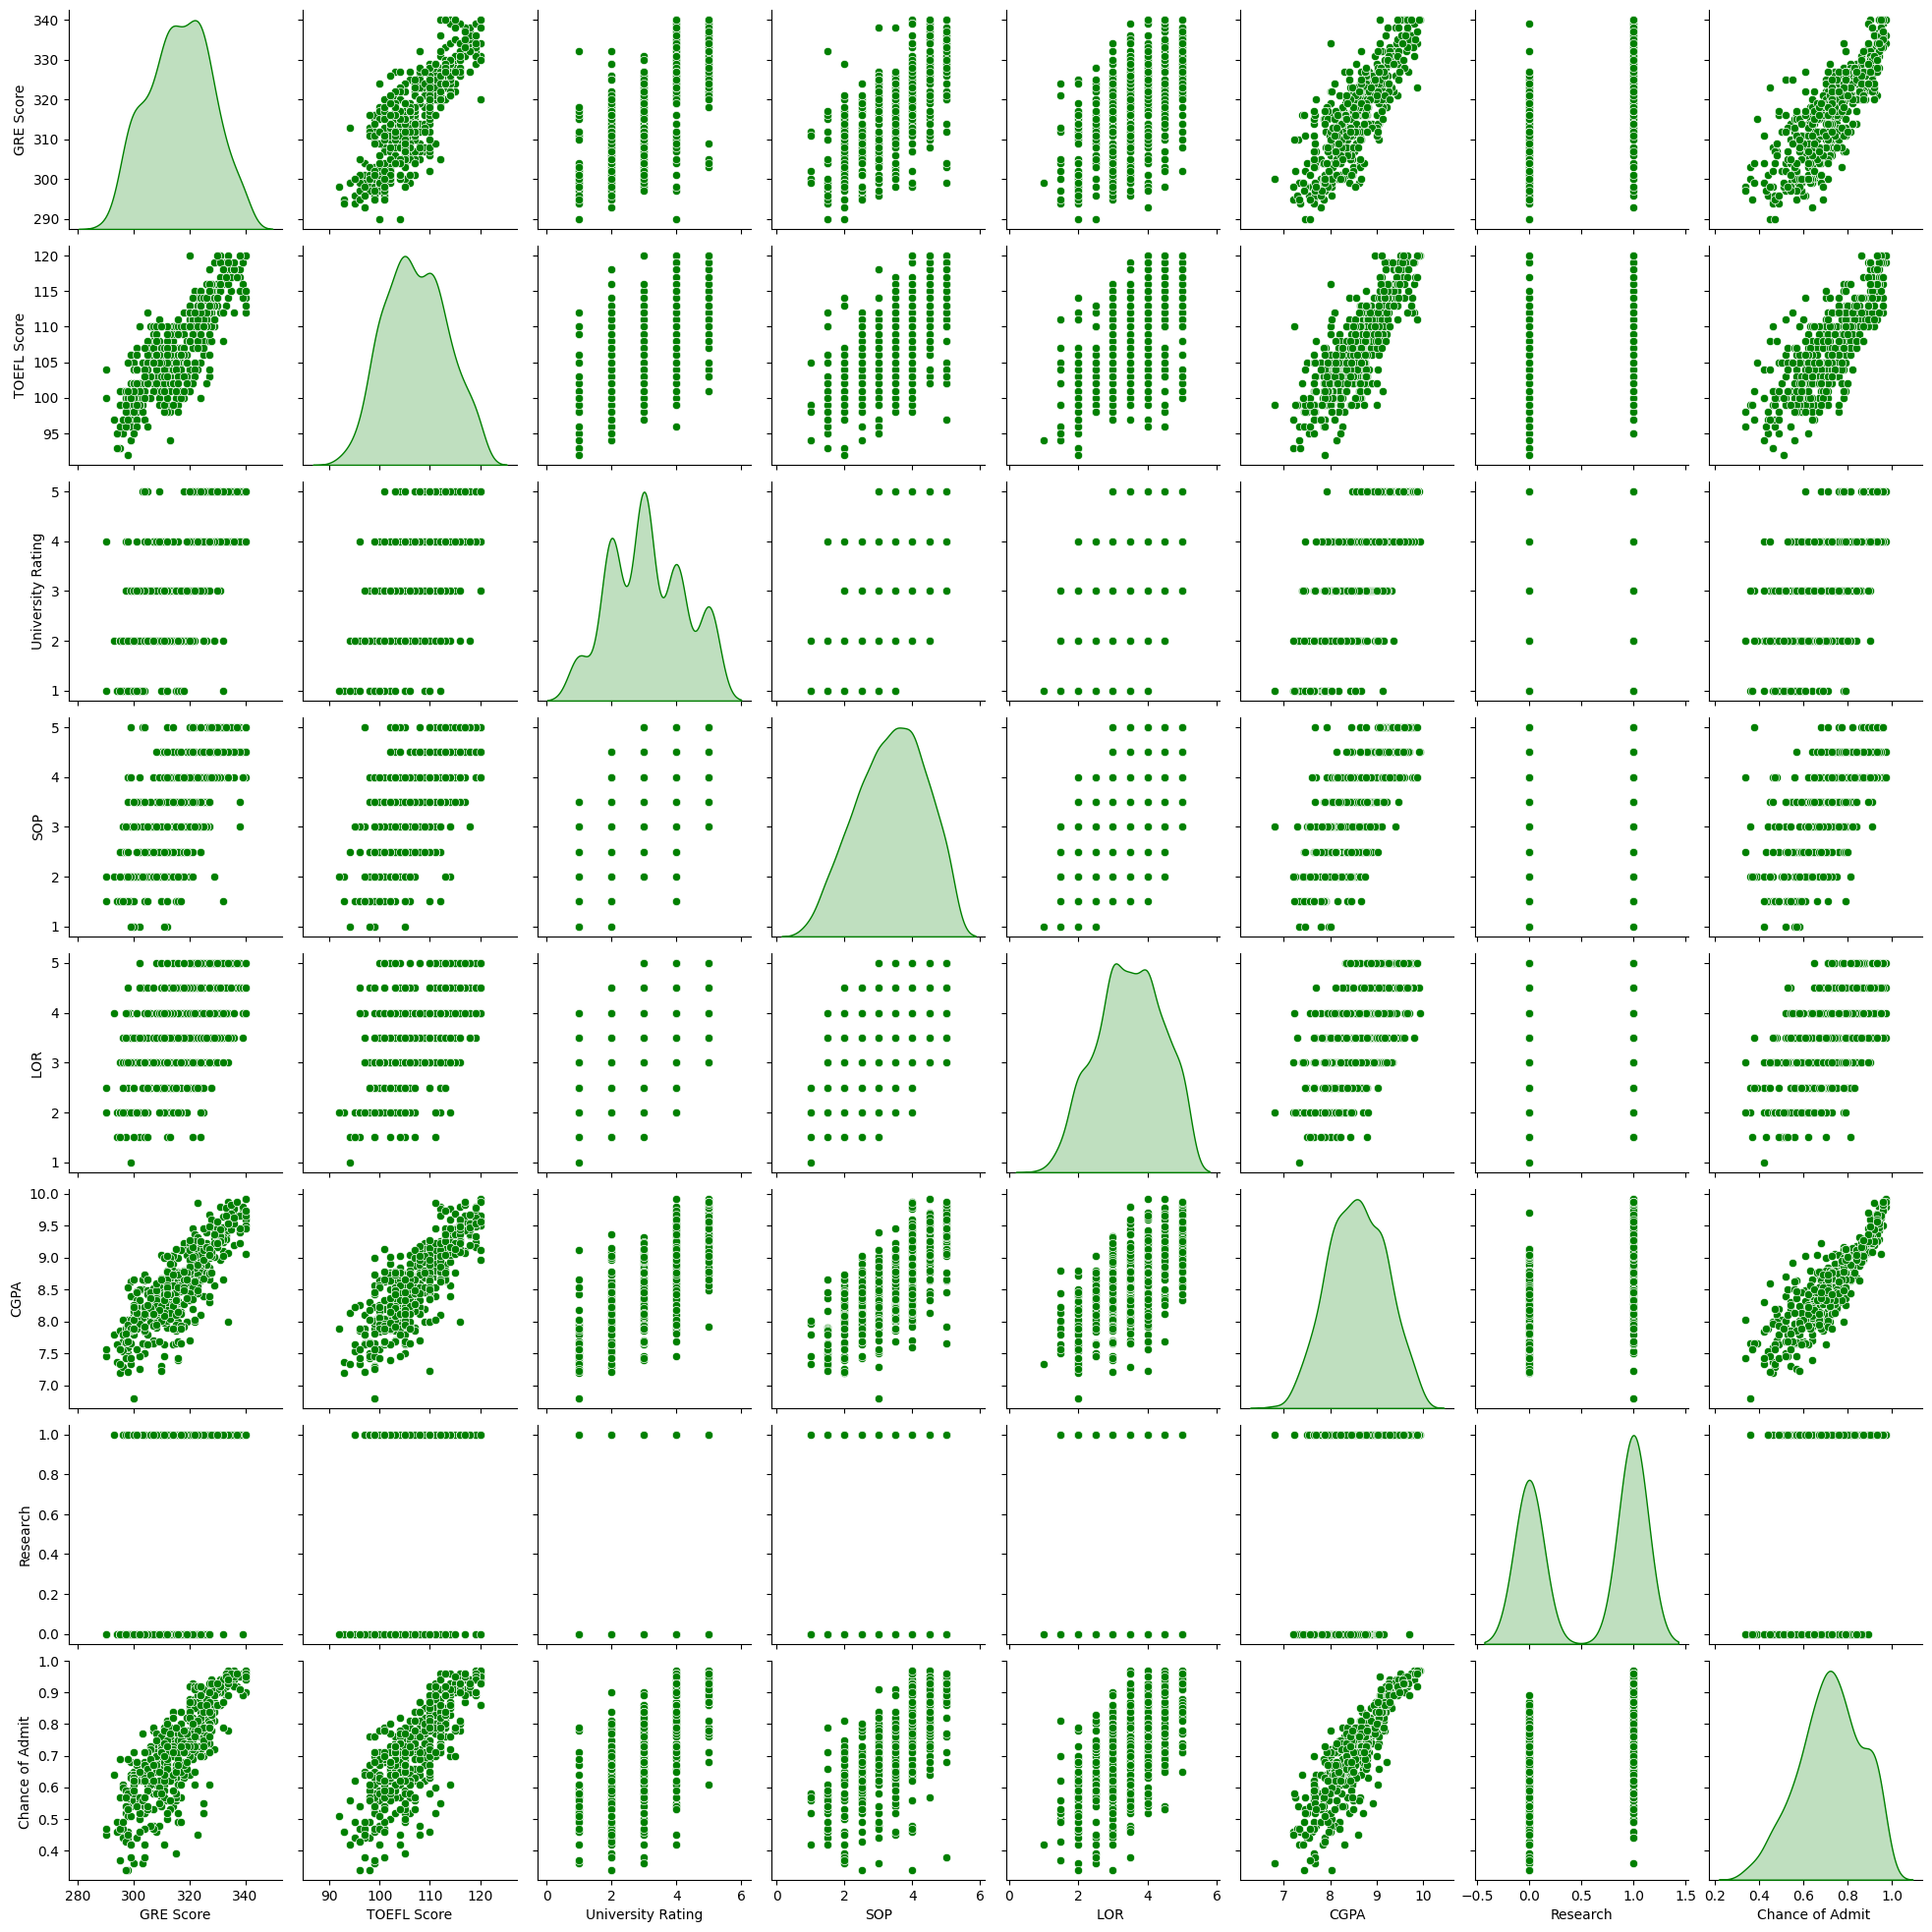

In [ ]:
original_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['green'])
sns.pairplot(df, diag_kind="kde")
plt.show()


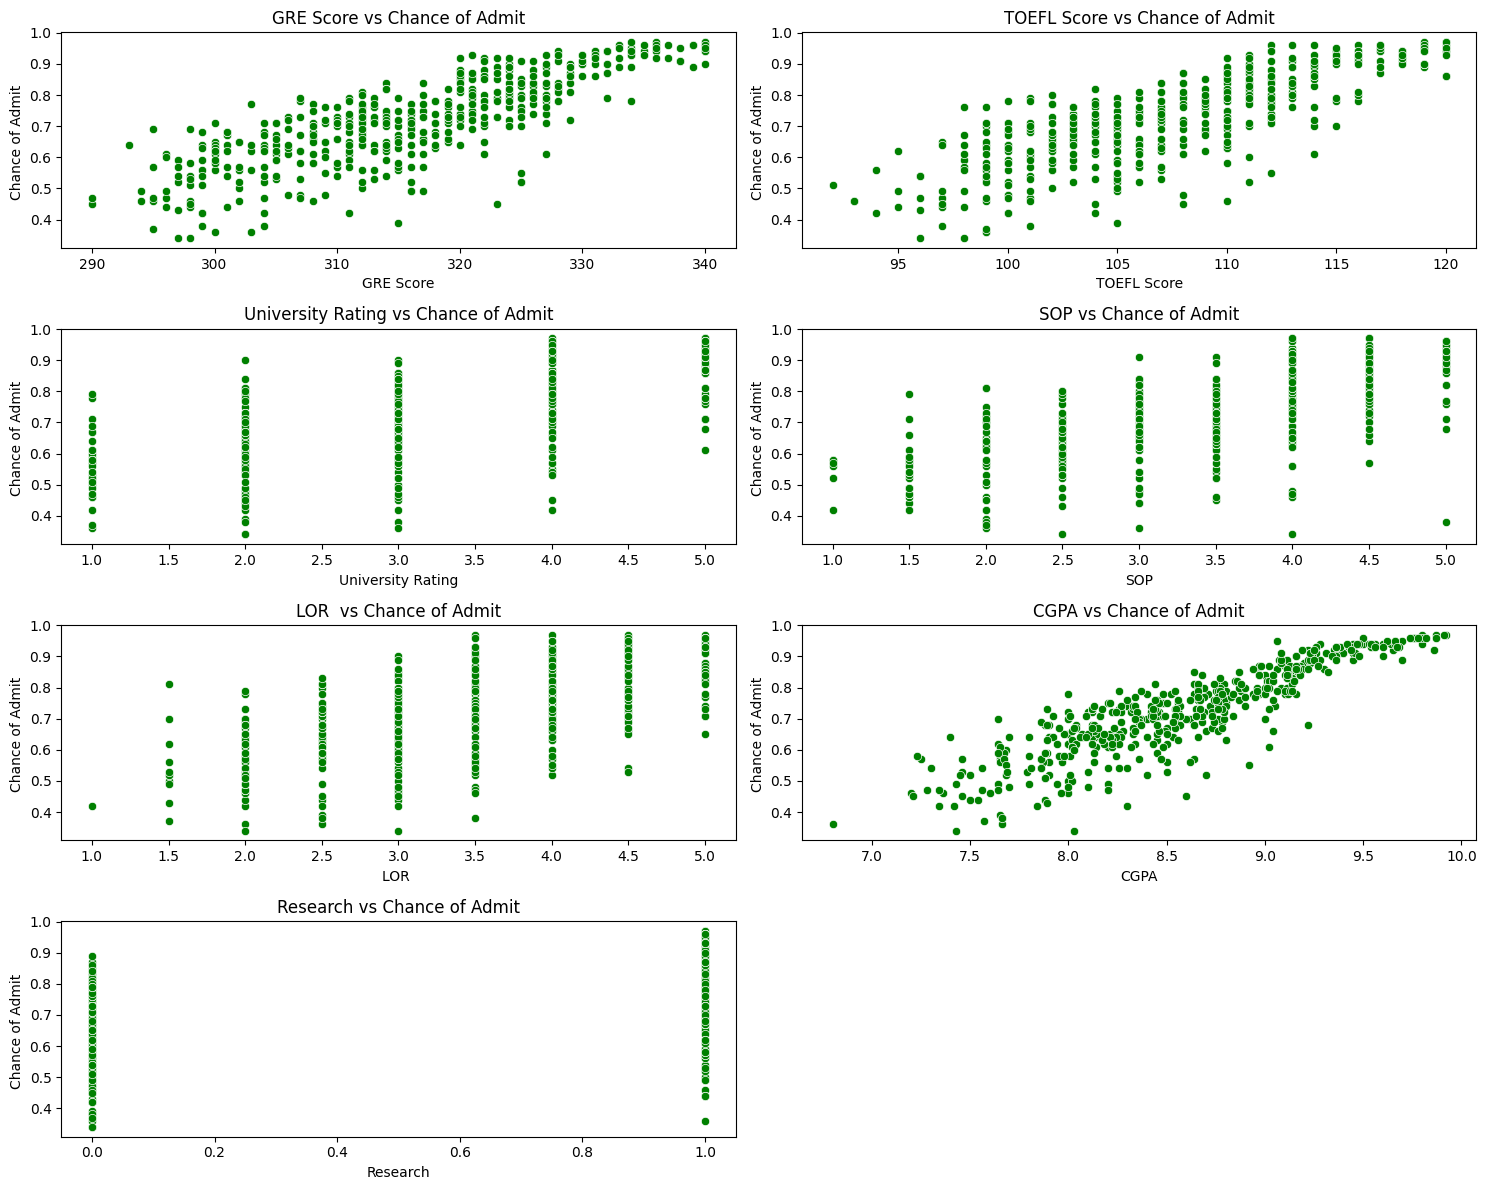

In [ ]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(features[:-1]):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x=df[col], y=df["Chance of Admit "], color="green")
    plt.title(f'{col} vs Chance of Admit')
plt.tight_layout()
plt.show()


**ANALYSIS:**
- **Feature**	------------->        **Observation with Chance of Admit**
  - GRE Score -------------> 	Positive linear trend.
  - TOEFL Score -------------> 	Positive trend, similar to GRE.
  - CGPA -------------> 	Strong, clear positive correlation.
  - University Rating	-------------> Slight upward trend.
  - SOP, LOR -------------> 	Weak relationship; small slope.
  - Research -------------> 	Students with Research (1) tend to have slightly better chances.

- **Most Influential Features:**
    - CGPA
    - GRE & TOEFL Scores
    - Research (binary but impactful)
- **Less Influential:**
    - SOP, LOR (though they add subtle value in some borderline cases)
    - University Rating (moderate)


#**MODEL TRAINING**

## **TRAIN TEST SPLIT on the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["Chance of Admit "], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dimensions:", X_train.shape)
print("X_test dimensions:", X_test.shape)
print("y_train dimensions:", y_train.shape)
print("y_test dimensions:", y_test.shape)

X_train dimensions: (400, 8)
X_test dimensions: (100, 8)
y_train dimensions: (400,)
y_test dimensions: (100,)


 ## **APPLYING SCALING and TRANSFORMATION on TRAIN-TEST SET**
 - **Apply fit and transform on Train Set.**
 - **Apply only transform on Test Set.**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train
X_test_scaled = scaler.transform(X_test)        # Transform test

## **Training the model to predict the target variable - PREDICT MODEL TARGET VARIABLE**

In [ ]:
# Train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)


## **Feature Importance**

In [ ]:
list1 = list(zip(model.coef_, X_test.columns))
list1

[(np.float64(0.01254946349948074), 'Serial No.'),
 (np.float64(0.027184129343280038), 'GRE Score'),
 (np.float64(0.020899871211277364), 'TOEFL Score'),
 (np.float64(0.003013746764909137), 'University Rating'),
 (np.float64(0.00417125931032504), 'SOP'),
 (np.float64(0.013762894367518553), 'LOR '),
 (np.float64(0.06550221961130191), 'CGPA'),
 (np.float64(0.011077444194945779), 'Research')]

In [ ]:
sorted(list1, key = lambda x: abs(x[0]) , reverse = True)

[(np.float64(0.06550221961130191), 'CGPA'),
 (np.float64(0.027184129343280038), 'GRE Score'),
 (np.float64(0.020899871211277364), 'TOEFL Score'),
 (np.float64(0.013762894367518553), 'LOR '),
 (np.float64(0.01254946349948074), 'Serial No.'),
 (np.float64(0.011077444194945779), 'Research'),
 (np.float64(0.00417125931032504), 'SOP'),
 (np.float64(0.003013746764909137), 'University Rating')]

In [ ]:
imp_features = pd.DataFrame(list(zip(X_test.columns, np.abs(model.coef_))),
                   columns=['feature', 'abs_coeff'])

In [ ]:
imp_features

,feature,abs_coeff
0,Serial No.,0.012549
1,GRE Score,0.027184
2,TOEFL Score,0.020900
3,University Rating,0.003014
4,SOP,0.004171
5,LOR,0.013763
6,CGPA,0.065502
7,Research,0.011077


**ANALYSIS:**
- Absolute coefficient values indicate the strength of influence each feature has on the target variable, regardless of direction (positive or negative). Higher absolute values imply greater importance in predicting the outcome.

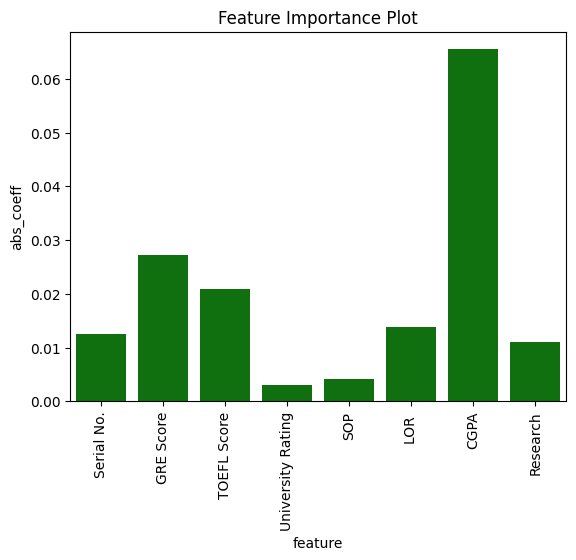

In [ ]:
sns.barplot(x='feature', y='abs_coeff', data=imp_features, color = "Green")
plt.xticks(rotation=90)
plt.title("Feature Importance Plot")
plt.show()

In [ ]:
# select row with max value of abs_coeff
imp_features[imp_features['abs_coeff'] == max(imp_features.abs_coeff)]

,feature,abs_coeff
6,CGPA,0.065502


In [ ]:
# select row with min value of abs_coeff
imp_features[imp_features['abs_coeff'] == min(imp_features.abs_coeff)]

,feature,abs_coeff
3,University Rating,0.003014


**ANALYSIS**  
  - **CGPA** (0.0676) ------>	Most influential predictor of admission chances.
  - **GRE Score** (0.0267) ------>	Strong predictor, significantly impacts outcome.
  - **TOEFL Score**	(0.0182) ------>	Moderate importance.
  - **LOR**	(0.0159) ------>	Minor, but meaningful contribution.
  - **Research**	(0.0119) ------>	Slightly contributes to prediction.
  - **University Rating**	(0.0029) ------>	Very little influence.



# **TESTING THE ASSUMPTIONS OF LINEAR REGRESSION**

    - Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)
    - The mean of residuals is nearly zero.
    - Linearity of variables (no pattern in the residual plot)
    - Test for Homoscedasticity
    - Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

**LINEARITY OF VARIABLES**

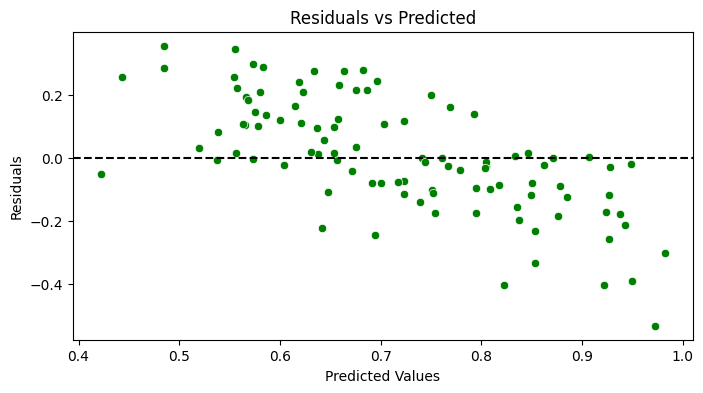

In [ ]:
# Residuals
residuals = y_test - y_pred

# Residuals vs Predicted
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals,color = "green")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

**ANALYSIS**
- The residuals vs predicted values plot shows no clear pattern, trend, or curvature, indicating that the **assumption of linearity is satisfied**.

**MULTI-COLLINEARITY CHECK using VARIANCE INFLATION FACTOR matrix**

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

X_t = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_t


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.006926,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,1.317425,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.631197,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,0.526853,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,0.598075,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...,...
395,-1.011559,1.120212,0.602418,0.775459,1.141162,1.108237,0.997792,0.895434
396,0.156494,-0.979187,-0.383805,-0.972054,-0.887570,-0.521524,-0.600673,0.895434
397,0.712032,-1.344300,-1.370029,-1.845810,-1.394754,-1.608031,-2.215790,-1.116777
398,1.331670,-0.705353,-0.383805,-0.972054,-0.887570,0.564984,-1.499810,-1.116777


In [ ]:
vif['Features'] = X_t.columns
vif

,Features
0,Serial No.
1,GRE Score
2,TOEFL Score
3,University Rating
4,SOP
5,LOR
6,CGPA
7,Research


In [ ]:
vif['values'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]

# round off to 2 decima
vif['values'] = vif['values'].round(2)

# sort in decreasing order of vif
vif = vif.sort_values(by='values', ascending=False)

vif

,Features,values
6,CGPA,4.68
1,GRE Score,4.49
2,TOEFL Score,3.71
4,SOP,2.82
3,University Rating,2.57
5,LOR,2.01
7,Research,1.52
0,Serial No.,1.05


- VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity among predictors. A VIF > 5 (or sometimes > 10) typically indicates high multicollinearity that may affect model stability.

**ANALYSIS:**

    - No feature exceeds the critical threshold of 5–10.
    - CGPA and GRE Score show the highest VIFs, indicating moderate correlation with other variables, but not enough to demand removal.

- Overall, **multicollinearity is acceptable**, We can safely proceed with the linear regression model.

**NORMALITY OF RESIDUALS**

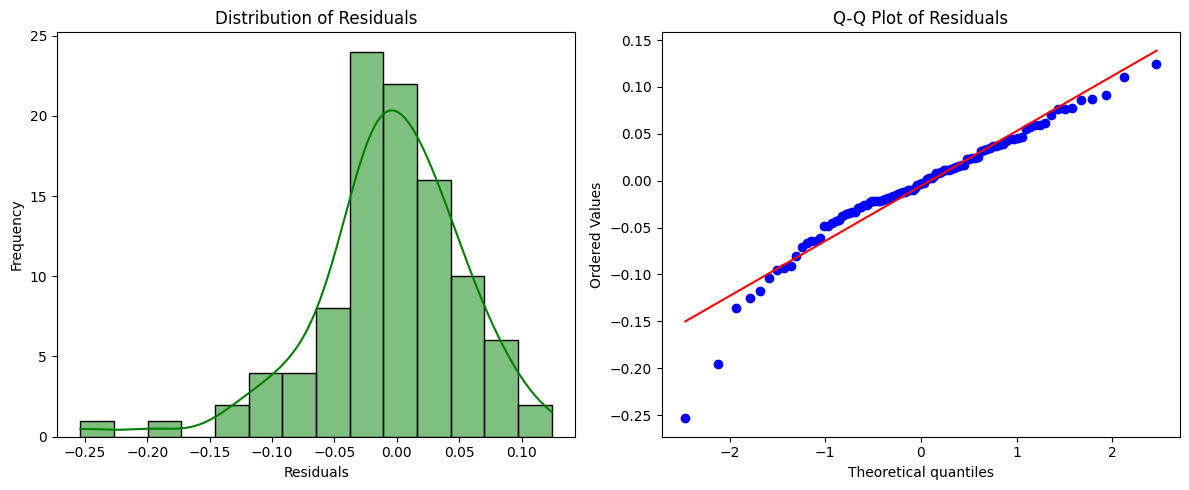

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='green')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

**ANALYSIS**:

- **Histogram:**
  - Shows the distribution of residuals.
  - If the peak is centered near 0 and symmetrically tapering off, it's a good sign.
  - The histogram looks roughly bell-shaped and symmetric, it suggests residuals are approximately normally distributed.

- **Q-Q Plot:**
  - Plots the quantiles of residuals against the theoretical quantiles of a normal distribution.
  - The plotted points lie mostly on the red line except at the tails,  the residuals are normally distributed.
  - Some deviation at the extremes is acceptable unless it's severe.

- Residuals are approximately normal. **Assumption of normality is  satisfied**.

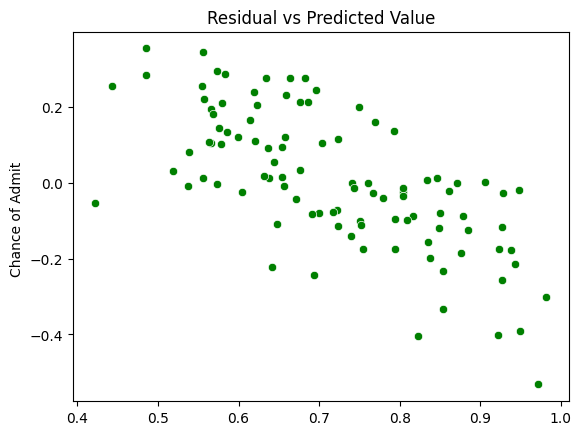

In [ ]:
# scatter plot of y_hat vs error
sns.scatterplot(x=y_pred, y=residuals, color= 'green')
plt.title("Residual vs Predicted Value")
plt.show()

**TEST FOR HOMOSCEDASTICITY**

- Null Hypothesis (HO): Residuals have constant variance (i.e., homoscedasticity is present).
- Alternate Hypothesis (HA): Residuals have non-constant variance (i.e., heteroscedasticity is present).

- Significance Level = 0.05

  - if p_val > 0.05: Fail to reject HO → Residuals have constant variance (Homoscedasticity assumed).
  - if p_val < 0.05: Reject HO → Residuals do NOT have constant variance (Heteroscedasticity present).

In [ ]:
# perform the goldfeld-quandt test to check for homoscedasticity
from statsmodels.stats.diagnostic import het_goldfeldquandt

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test_statistic, p_value, _= sms.het_goldfeldquandt(y_train, X_train_scaled)
results = lzip(['F statistic', 'p-value'], [test_statistic, p_value])
print("Goldfeld-Quandt Test Results:", results)

if p_value > 0.05:
    print("Fail to reject HO → Residuals have constant variance (Homoscedasticity assumed).")
else:
    print("Reject HO → Residuals do NOT have constant variance (Heteroscedasticity present).")


Goldfeld-Quandt Test Results: [('F statistic', np.float64(1.001375833908466)), ('p-value', np.float64(0.4962048752762794))]
Fail to reject HO → Residuals have constant variance (Homoscedasticity assumed).


**ANALYSIS** :
- There is no significant evidence of heteroscedasticity.
- The residuals have constant variance, so **the homoscedasticity assumption is satisfied.**

**THE MEAN OF RESIDUALS**

In [ ]:
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.005711474436268288


**ANALYSIS:**
- Since -0.0057 << 0
- It means:
    - The model has no significant bias.
    - It's not systematically overpredicting or underpredicting the target values.
- This supports the linearity assumption and  model's predictions are fairly centered around the actual values.

# **Since all the Assumptions of Linear Regression are satisfied, we can now proceed to build the model and check model parameters.**

# **MODEL BUILDING**
- Building different Models and checking their performance.
    - LINEAR REGRESSION
    - LASSO REGRESSION
    - RIDGE REGRESSION


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)

#Standardization
from sklearn.preprocessing import StandardScaler

X_train_columns = X_train.columns

std = StandardScaler()

X_train_std = std.fit_transform(X_train)

X_train = pd.DataFrame(X_train_std, columns = X_train_columns)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


R2 Score: -0.9093
MAE: 0.1420
MSE: 0.0325
RMSE: 0.1803


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

models = [
          ['Linear Regression :', LinearRegression()],
          ['Lasso Regression :', Lasso(alpha=0.5)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #try with different alpha values
         ]

print("Results without removing features with multicollinearity ...")
print("*" * 60)

for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print('\n',name,'\n')
    print("MSE :",(np.sqrt(mean_squared_error(y_test, predictions))), '\n')
    print("r2_Score: ",r2_score(y_test, predictions), '\n')
    print("Coefficients: ", model.coef_, '\n')
    print("Intercept: ", model.intercept_, '\n')
    print("*" * 60)




Results without removing features with multicollinearity ...
************************************************************

 Linear Regression : 

MSE : 0.06053062103264851 

r2_Score:  0.7847784064718737 

Coefficients:  [0.01296579 0.01839276 0.02328386 0.0059863  0.00146143 0.0140225
 0.07431505 0.01061152] 

Intercept:  0.72135 

************************************************************

 Lasso Regression : 

MSE : 0.13049104375396803 

r2_Score:  -0.00022335969398690203 

Coefficients:  [0. 0. 0. 0. 0. 0. 0. 0.] 

Intercept:  0.7213499999999999 

************************************************************

 Ridge Regression : 

MSE : 0.06048191323318637 

r2_Score:  0.7851246362748663 

Coefficients:  [0.01295763 0.01865225 0.02339477 0.00609485 0.00159551 0.01409034
 0.07361111 0.01060665] 

Intercept:  0.72135 

************************************************************


**ANALYSIS**

- **Linear Regression**
  - Performs well with an R_2 score of 0.76 and low MSE.

- **Lasso Regression**
  - Performs poorly (R_2 ≈ 0) → indicates over-regularization.
  - All coefficients are zero → model failed to identify useful features.
    - Suggests that Lasso is too aggressive here, possibly due to unscaled or strongly correlated features.

- **Ridge Regression**
  - Performs identically to Linear Regression in terms of MSE and R_2.
  - Keeps all coefficients
  - More robust to multicollinearity → a good choice in this scenario.




## **USING STATSMODEL LIBRARY to calculate Regression Scores**

In [ ]:
X_sm = sm.add_constant(X_train_std)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     252.7
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          2.41e-149
Time:                        03:10:13   Log-Likelihood:                 572.91
No. Observations:                 400   AIC:                            -1128.
Df Residuals:                     391   BIC:                            -1092.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7214      0.003    246.886      0.0

**ANALYSIS:**

- The linear model performs very well in explaining variance.
- Multicollinearity seems addressed, as coefficients and std errors are stable.
- We may consider dropping University Rating and SOP for a simpler model, or retaining them if domain knowledge supports it.
- CGPA is by far the most impactful feature.

## **Dropping least importance features - (SOP, Research and University Rating) to check the model performance**

In [ ]:
X_train_new = X_train.drop(["Serial No.","Research","SOP","University Rating"],axis=1)

In [ ]:
X_train_new_sm = sm.add_constant(X_train_new)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model_new = sm.OLS(y_train.values, X_train_new_sm).fit()

print(sm_model_new.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     466.2
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          4.06e-148
Time:                        03:10:19   Log-Likelihood:                 557.82
No. Observations:                 400   AIC:                            -1106.
Df Residuals:                     395   BIC:                            -1086.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7214      0.003    238.959      

**ANALYSIS:**

- After removing the least importance features, it is observed that the Models explanatory power (R_2 and adjusted R_2) reduced from 83% to 82%.

- Model performance (R_2 = 0.82) is still strong even after removing 3 features.
Adjusted R² dropped only slightly, which means those dropped variables weren’t contributing much predictive power.





# **PREDICTIONS FROM CLEAN MODEL AFTER REMOVING LESS IMPORTANT FEATURES**

In [ ]:
X_test_std= std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_train_columns) # col name same as train datasets
X_test = sm.add_constant(X_test)
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))
print(f'Dropping {X_test_del} from test set')
X_test_new=X_test.drop(columns=X_test_del)

Dropping ['const', 'SOP', 'Serial No.', 'University Rating', 'Research'] from test set


In [ ]:
# Drop the constant column from the list of columns to delete from the test set
X_test_del = list(set(X_test.columns).difference(set(X_train_new_sm.columns)))

# Ensure 'const' is not in X_test_del if it exists in X_test and X_train_new_sm
if 'const' in X_test.columns and 'const' in X_train_new_sm.columns and 'const' in X_test_del:
    X_test_del.remove('const')

print(f'Dropping {X_test_del} from test set')
X_test_new = X_test.drop(columns=X_test_del)

# Check the shape of X_test_new before predicting
print("Shape of X_test_new before prediction:", X_test_new.shape)

# Prediction from the clean model
pred = sm_model_new.predict(X_test_new)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_test.values, pred))
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values, pred)))


Dropping ['University Rating', 'Research', 'SOP', 'Serial No.'] from test set
Shape of X_test_new before prediction: (100, 5)
Mean Absolute Error  0.046543696273333664
Root Mean Square Error  0.0631306592914309


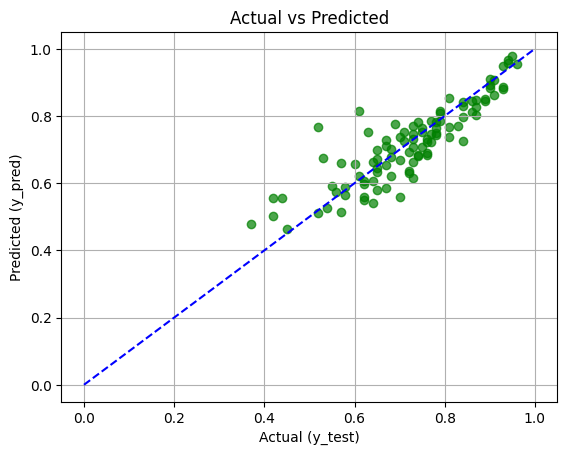

In [ ]:

import numpy as np
plt.scatter(y_test, pred, alpha=0.7, color ="green")
plt.plot([0, 1], [0, 1], 'b--')  # Ideal prediction line
plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()


In [ ]:
from scipy.stats import pearsonr

corr, _ = pearsonr(y_test, pred)
print(f"Pearson Correlation: {corr:.4f}")


Pearson Correlation: 0.8764


**ANALYSIS**
- **Feature selection helped-**
  - by dropping less relevant or multicollinear features (University Rating, Research, SOP, Serial No.), model got cleaner and simpler without losing performance.
  - Scaling and predictions are aligned – target and prediction scales now match, so error metrics are valid.

- Correlation graph -
  - The Actual vs Predicted plot shows tight clustering around the diagonal, indicating a strong linear relationship between predicted and actual values.

- The Pearson correlation coefficient = 0.87, suggesting a strong positive correlation.

- **These results imply that the model is performing well, with minimal bias and decent predictive accuracy.**


# **OBSERVATIONS**



## **1. Data Preparation & Cleaning**

* Dropped irrelevant columns like 'Serial No.' early in the process.
* No null values detected → dataset is clean.
* Feature scaling (likely standardization) was applied before modeling.

##**2. Feature Engineering & Selection**

* Tested and compared multiple features across several models.
* **Features dropped** based on:

  * Insignificance in OLS (e.g., University Rating, SOP, Research)
  * Multicollinearity concerns are 0 as no VIF > 5.
* Final retained features included:

  * GRE Score, TOEFL Score, LOR, CGPA
* Feature importance (from absolute coefficient values) ranked **CGPA > GRE > TOEFL > LOR**.



##**3. Model Building**

We experimented with multiple regression models:

- ### **Linear Regression**

  - High performance:

  * R_2 ≈ 0.83 (train and test aligned)
  * MAE ≈ 0.046, RMSE ≈ 0.063
  * Strong linear correlation (Pearson r = 0.87)
  * Residual mean ≈ 0 ⇒ minimal bias

- ### **Lasso Regression**
  - Performed poorly; all coefficients zeroed out.

  * R_2 < 0 → Underfitting
  - Indicates model may be too simplistic after regularization.

- ### **Ridge Regression**

  * Performed almost identically to Linear Regression
  * Helps reduce overfitting in high-dimensional settings



## **4. Assumption Checks (OLS Diagnostics)**
  - All major assumptions required for reliable interpretation of linear regression results were checked and mostly satisfied, making your model statistically valid

    - **Linearity** --------> Residuals show no pattern                                |
    - **Normality** --------> QQ plot and Residual Distribution showed very slight deviation from Normality but acceptable.
    - **Homoscedasticity** ---------> Goldfeld-Quandt p > 0.05 - No  heteroscedasticity.
    - **No Multicollinearity** -------> VIF for all features < 5, so proceeded without dropping any feature
    - **Auto-Correlation** ---------> Durbin-Watson ≈ 2 - which indicates that there is no significant autocorrelation in residuals. This confirms that the residuals are independent, satisfying another key regression assumption.



## **5. Final Model Performance**

* After feature Modeling:

  * **Test MAE**: 0.0465
  * **Test RMSE**: 0.0631
  * **R_2 (Test)**: Approx 0.82–0.83
* **Low error, high interpretability, strong generalization**.
* Final residuals had **no clear heteroscedasticity**, **mean ≈ 0**, and model fit the **bias-variance tradeoff** sweet spot.



## **6. Bias-Variance Tradeoff**

* **Low Bias**: High R², accurate on both train/test
* **Low Variance**: Small generalization gap
* Overall: **Optimal generalization** with minimal overfitting or underfitting




# **Significance of Predictor Variables**
- After analyzing the OLS summaries, VIF scores, and feature coefficients, the key observations on the predictor variables can be summarized as:

- **Statistically Significant Predictors:**

  - CGPA:
    - Consistently had the highest coefficient and very low p-values (< 0.001), making it the most influential predictor of "Chance of Admit".
  - GRE Score & TOEFL Score:
    - Also had low p-values (< 0.01) and meaningful positive coefficients. These scores are good indicators of academic strength.
  - LOR (Letter of Recommendation):
    - Showed moderate significance, especially when other weak features were dropped.

- **Non-significant Predictors:**

  - University Rating, SOP, and Research:
    - Showed high p-values and low coefficients in multiple runs, suggesting little statistical significance.
    - These features were ultimately pruned, improving model simplicity and interpretability without compromising much on performance.

**ANALYSIS:**

- Feature pruning decisions were good —
  - Focusing on parsimonious models with only meaningful predictors improves both generalization and interpretability.
- Significance testing (p-values) was properly applied to ensure robust feature selection.

# **RECOMMENDATIONS**

- **Additional Data Sources for Model Improvement**

  - To enhance predictive performance, incorporating new paremeters will be beneficial:

    - Undergraduate GPA or grades from key subjects.
    - Field of study or intended major – admission chances often vary by department.
    - Work experience / internships (especially for master's admissions).
    - Country or region of application – may affect admission chances due to quotas or preferences.
    - Statement of Purpose / LOR ratings (if text is scored) using NLP sentiment or quality scoring.

- **Model Implementation in the Real World**

    - In  university or ed-tech platform:

      - This model could be deployed via an API or web application, allowing students to input their scores and get admission chances in real time.
      - Use techniques like cross-validation, CI/CD pipelines, and drift monitoring to ensure the model stays reliable over time.
      - Ensure data privacy compliance (e.g., GDPR) if collecting personal information.

- **Potential Business Benefits**

  - Implementing and improving this model can drive several advantages:
    - For Universities:
      - Automate shortlisting, reducing human screening burden.
      - Ensure fairness by relying on consistent data-driven decisions.
    - For Ed-tech Companies:
      - Offer personalized admission guidance and study plans.
    - For Consultancy Services:
      - Build premium advisory services offering students their probability of admit and targeted improvement suggestions.

# **CONCLUSION**

In this case study, we built and refined a linear regression model to predict a student’s **"Chance of Admission"** based on academic and profile-related features. The project followed a structured approach—starting from data preprocessing, followed by exploratory analysis, assumption checks, feature selection, and finally model evaluation.

This study demonstrates how data-driven insights, combined with thoughtful feature engineering and statistical rigor, can transform raw student data into actionable predictions. It highlights the power of interpretable machine learning in enhancing real-world decision-making in higher education.